### MapCorps , NYC "power wall" menthol rating  

#### Author : Avigai Vantu NYU mHealth , March 2017

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

from sklearn.metrics import cohen_kappa_score

%pylab inline

Failed `CDLL(/opt/local/lib/libgeos_c.dylib)`


Populating the interactive namespace from numpy and matplotlib


In [2]:
# we need to account for diffrences b/w raters, so find the interval between two columns
#for example and flag anyt gap which is bigger than 20%. 

In [3]:
mc = pd.read_csv('mapcorps_stopsMar22.csv')

In [4]:
mc.head(5)

,outletID,Subway Station,Tobacco Outlet Address,ZIP,Important Notes,Images (Y/N),Quality (Y/N),Quality (Y/N) Comments,Name,Borough,...,Non-cons 2,Num_All_2,denom_all_2.1,Name*,Cons*,Num_Green,Denom_All,Non-cons*,Num_All,Denom_All.1
0,1,"7th Ave. (B,Q)",310 FLATBUSH AVE Brooklyn NY 11238,11238,partially hidden behind counter,Y,Y,Y,Janelle,BK,...,4/34,4.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"7th Ave. (B,Q)",387 FLATBUSH AVE Brooklyn NY 11238,11238,"very far behind counter, difficult to see",Y,Y,Y - But does not capture all cigs on display,Janelle,BK,...,3/18,3.0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"7th Ave. (B,Q)",322 FLATBUSH AVE Brooklyn NY 11238,11238,Difficult to see if menthol,Y,Y,Y - Blurry,Janelle,BK,...,10/42,10.0,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bedford Ave. (L),150 N 7TH ST Brooklyn NY 11211,11221,NaN,Y,Y,Y,Janelle & Sally,BK,...,11/34,11.0,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bedford Ave. (L),183 BEDFORD AVE Brooklyn NY 11211,11221,NaN,Y,Y,Y,Janelle & Sally,BK,...,20/50,20.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print  mc.dtypes

outletID                     int64
Subway Station              object
Tobacco Outlet Address      object
ZIP                          int64
Important Notes             object
Images (Y/N)                object
Quality (Y/N)               object
Quality (Y/N) Comments      object
Name                        object
Borough                     object
name_1                      object
Cons 1                      object
numerator green_1            int64
denom_all_1                  int64
Non-cons 1                  object
numerator all_1              int64
denom_all_1.1                int64
name_2                      object
Cons 2                      object
numerator green_2          float64
denom_all_2                float64
Non-cons 2                  object
Num_All_2                  float64
denom_all_2.1               object
Name*                       object
Cons*                       object
Num_Green                  float64
Denom_All                  float64
Non-cons*           

In [6]:
#mc= mc.reset_index()
#del mc['index']

In [7]:
#mc = mc.reset_index(drop=True)

mc.reset_index(inplace=True)

In [8]:
# making sure .1 and .2 are duplicats 

print mc['denom_all_1.1'].head()
print mc['denom_all_1'].head()
print mc['denom_all_2.1'].head()
print mc['denom_all_2'].head()
print mc['Denom_All.1'].head()

0     38
1     14
2    339
3     34
4     46
Name: denom_all_1.1, dtype: int64
0     38
1     14
2    339
3     34
4     46
Name: denom_all_1, dtype: int64
0    34
1    18
2    42
3    34
4    50
Name: denom_all_2.1, dtype: object
0    34.0
1    18.0
2    42.0
3    34.0
4    50.0
Name: denom_all_2, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Denom_All.1, dtype: float64


In [9]:
# delete duplicates 

del mc['denom_all_1.1']

del mc['denom_all_2.1']

del mc['Denom_All.1']

In [10]:
#how does it looks now? 

print  mc.dtypes

index                        int64
outletID                     int64
Subway Station              object
Tobacco Outlet Address      object
ZIP                          int64
Important Notes             object
Images (Y/N)                object
Quality (Y/N)               object
Quality (Y/N) Comments      object
Name                        object
Borough                     object
name_1                      object
Cons 1                      object
numerator green_1            int64
denom_all_1                  int64
Non-cons 1                  object
numerator all_1              int64
name_2                      object
Cons 2                      object
numerator green_2          float64
denom_all_2                float64
Non-cons 2                  object
Num_All_2                  float64
Name*                       object
Cons*                       object
Num_Green                  float64
Denom_All                  float64
Non-cons*                   object
Num_All             

In [11]:
# create new columns to caclulate the prcentage of green products in the 
#"power wall" by dviding numerator green by denominator green


#for green 1

mc['precgreen1'] = (mc['numerator green_1']/mc['denom_all_1'])*100

#for green 2

mc['precgreen2'] = (mc['numerator green_2']/mc['denom_all_2'])*100

#for non green menthol products 1

mc['precall1'] = (mc['numerator all_1']/mc['denom_all_1'])*100

#for non green menthol products 2

mc['precall2'] = (mc['Num_All_2']/mc['denom_all_2'])*100


In [12]:
#mc['Num_All_2']['precall2'][71:74]

In [13]:
#averge between rater one and rater two. 

# for green apply: create new column for:  (precntage of green 1 + precentage of green 2)/ 2 

mc['avrgreen'] = (mc['precgreen1'] + mc['precgreen2']) / 2


# for green + non green menthol products apply: (precntage of all 1 + precentage of all 2)/ 2 

mc['avrall'] = (mc['precall1'] + mc['precall2']) / 2



In [14]:
#does the avr look reasonable for green rating? 

#new
print mc['avrgreen'].head()
#and the rest
print mc['precgreen1'].head()
print mc['precgreen2'].head()

0    10.835913
1    19.047619
2    15.992415
3    26.470588
4    30.217391
Name: avrgreen, dtype: float64
0    15.789474
1    21.428571
2    17.699115
3    26.470588
4    30.434783
Name: precgreen1, dtype: float64
0     5.882353
1    16.666667
2    14.285714
3    26.470588
4    30.000000
Name: precgreen2, dtype: float64


In [15]:
# how about for non green products? 

#new
print mc['avrall'].head()

#an the rest
print mc['precall1'].head()
print mc['precall2'].head()

# when there's an NaN in one column or both the avr will be NaN as well 


0    13.777090
1    22.619048
2    20.754319
3    30.882353
4    36.304348
Name: avrall, dtype: float64
0    15.789474
1    28.571429
2    17.699115
3    29.411765
4    32.608696
Name: precall1, dtype: float64
0    11.764706
1    16.666667
2    23.809524
3    32.352941
4    40.000000
Name: precall2, dtype: float64


In [16]:
# let's try to identify outliers or gaps among raters. 
# to do so I will calculate the absulute interval b/w the 
# precentage of green products of rater 1 and rater 2 

# create a new column ==  | %green1 - %green2 |

mc['green_gap'] = abs(mc['precgreen1'] - mc['precgreen2'])

# create a new column ==  | %green1 - %green2 | 

mc['all_gap'] = abs(mc['precall1'] - mc['precall2'])


print mc.green_gap.head()

print mc.all_gap.head()

0    9.907121
1    4.761905
2    3.413401
3    0.000000
4    0.434783
Name: green_gap, dtype: float64
0     4.024768
1    11.904762
2     6.110409
3     2.941176
4     7.391304
Name: all_gap, dtype: float64


green mean 10.6861226067
all mean 13.1736452007


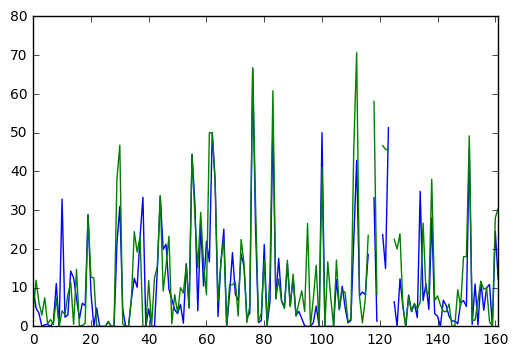

In [17]:
#plot the gap b/w rater one and rater 2


mc.green_gap.plot()

mc.all_gap.plot()

print "green mean", mc.green_gap.mean()

print "all mean", mc.all_gap.mean()

In [18]:
# calculate standard deviation 

# 1. for all
print "std of precentage of all", mc.avrall.std()

# 2. for green 

print "std of precentage of green", mc.avrgreen.std()



std of precentage of all 15.9582142678
std of precentage of green 15.6805317437


In [19]:
# plot the 

In [20]:
# create data frames which have more than 20% gap b/w raters

mc_green_gap = mc[mc['green_gap']>20]
mc_all_gap = mc[mc['all_gap']>20]

#who is this outlier? 
print mc[mc['green_gap']>50].head()

     index  outletID                        Subway Station  \
76      76        77  Westchester Sq - E Tremont, 6 train    
83      83        84                       125 St, 1 train   
123    123       124                     67th Ave. (E,M,R)   

                    Tobacco Outlet Address    ZIP             Important Notes  \
76   134 WESTCHESTER SQUARE Bronx NY 10461  10461                Vendor empty   
83       501 W 125TH ST Manhattan NY 10027  10027                         NaN   
123         6725 AUSTIN ST Queens NY 11375  11375  partially blocked by signs   

    Images (Y/N) Quality (Y/N) Quality (Y/N) Comments     Name    ...      \
76             Y             Y                       Y     NaN    ...       
83             Y             Y           Y; acceptable   Sally    ...       
123            Y             Y            Y-acceptable  Rachel    ...       

    Non-cons* Num_All precgreen1  precgreen2   precall1   precall2   avrgreen  \
76        NaN     NaN   0.000000   6

In [21]:
mc_green_gap.head()


,index,outletID,Subway Station,Tobacco Outlet Address,ZIP,Important Notes,Images (Y/N),Quality (Y/N),Quality (Y/N) Comments,Name,...,Non-cons*,Num_All,precgreen1,precgreen2,precall1,precall2,avrgreen,avrall,green_gap,all_gap
10,10,11,"Kings Highway (B,Q)",1521 KINGS HWY Brooklyn NY 11229,11229,Pharmacy,Y,Y,Y - Good quality,Janelle,...,NaN,NaN,12.307692,45.161290,16.923077,12.903226,28.734491,14.913151,32.853598,4.019851
19,19,20,Kosciuszko St. (J),1165 BROADWAY Brooklyn NY 11221,11221,NaN,Y,Y,Y - Not as clear but usable,Janelle,...,NaN,NaN,17.307692,46.153846,17.307692,46.153846,31.730769,31.730769,28.846154,28.846154
29,29,30,"Pennsylvania Ave. (2,3,4,5)",578 LIVONIA AVE Brooklyn NY 11207,11207,NaN,Y,Y,Y - Good but slightly blurry,Janelle,...,NaN,NaN,28.571429,50.000000,28.571429,66.666667,39.285714,47.619048,21.428571,38.095238
30,30,31,"Pennsylvania Ave. (2,3,4,5)",504 PENNSYLVANIA AVE Brooklyn NY 11207,11207,NaN,Y,Y,Y - Good quality although a bit dark,Janelle,...,NaN,NaN,11.111111,42.105263,11.111111,57.894737,26.608187,34.502924,30.994152,46.783626
37,37,38,"Sterling St. (2,5)",1037 NOSTRAND AVE Brooklyn NY 11225,11225,NaN,Y,Y,Y - Good quality,Janelle,...,NaN,NaN,7.692308,30.769231,7.692308,30.769231,19.230769,19.230769,23.076923,23.076923


In [22]:
len(mc_all_gap)

34

In [23]:
len(mc_green_gap)

29

In [24]:
#create data frames for each borough 

# 1. Queens: 

qndf = mc[mc['Borough'] =='QN']

# 2. Brooklyn: 

bkdf = mc[mc['Borough']== 'BK']

# 3. Bronx 

bxdf = mc[mc['Borough']== 'BX']

# 4. Manahttan 

mndf = mc[mc['Borough']== 'MN']


In [25]:
# print number of outlets per borough

print 'bronx', len(bxdf)

print 'brooklyn', len(bkdf)

print 'queens' , len(qndf)

print 'manahattan', len(mndf)


bronx 39
brooklyn 39
queens 46
manahattan 38


In [26]:
# reset 4 df index 

mndf.reset_index(inplace=True)
qndf.reset_index(inplace=True)
bxdf.reset_index(inplace=True)
bkdf.reset_index(inplace=True)

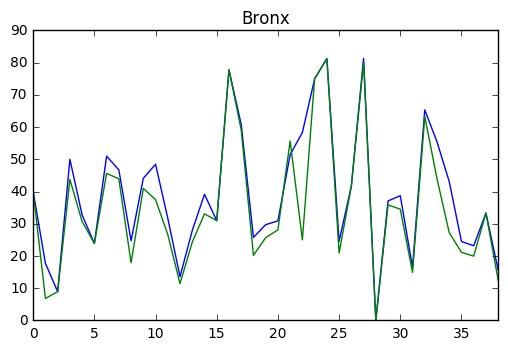

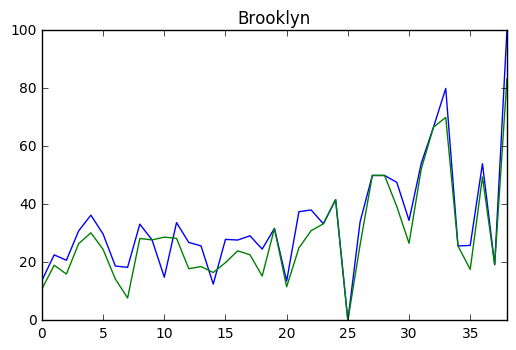

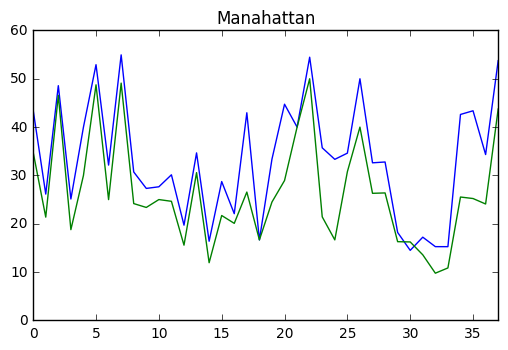

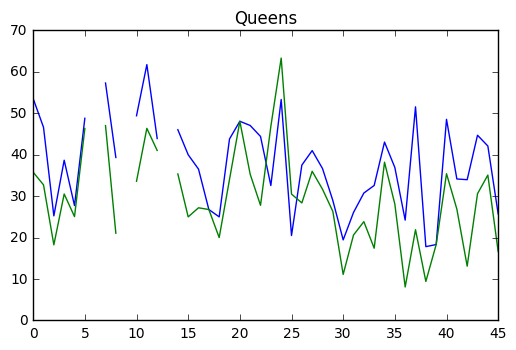

In [27]:
# plot the precentage green and non green for each boroough 

#bronx

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Bronx')

bxdf.avrall.plot()

bxdf.avrgreen.plot()
plt.show()

#brooklyn

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Brooklyn')

bkdf.avrall.plot()

bkdf.avrgreen.plot()
plt.show()

#Manahattan 

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Manahattan')

mndf.avrall.plot()

mndf.avrgreen.plot()
plt.show()


#Queens

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Queens')

qndf.avrall.plot()

qndf.avrgreen.plot()
plt.show()

In [28]:
del mndf['index']

In [29]:
bkdf

,level_0,index,outletID,Subway Station,Tobacco Outlet Address,ZIP,Important Notes,Images (Y/N),Quality (Y/N),Quality (Y/N) Comments,...,Non-cons*,Num_All,precgreen1,precgreen2,precall1,precall2,avrgreen,avrall,green_gap,all_gap
0,0,0,1,"7th Ave. (B,Q)",310 FLATBUSH AVE Brooklyn NY 11238,11238,partially hidden behind counter,Y,Y,Y,...,NaN,NaN,15.789474,5.882353,15.789474,11.764706,10.835913,13.777090,9.907121,4.024768
1,1,1,2,"7th Ave. (B,Q)",387 FLATBUSH AVE Brooklyn NY 11238,11238,"very far behind counter, difficult to see",Y,Y,Y - But does not capture all cigs on display,...,NaN,NaN,21.428571,16.666667,28.571429,16.666667,19.047619,22.619048,4.761905,11.904762
2,2,2,3,"7th Ave. (B,Q)",322 FLATBUSH AVE Brooklyn NY 11238,11238,Difficult to see if menthol,Y,Y,Y - Blurry,...,NaN,NaN,17.699115,14.285714,17.699115,23.809524,15.992415,20.754319,3.413401,6.110409
3,3,3,4,Bedford Ave. (L),150 N 7TH ST Brooklyn NY 11211,11221,NaN,Y,Y,Y,...,NaN,NaN,26.470588,26.470588,29.411765,32.352941,26.470588,30.882353,0.000000,2.941176
4,4,4,5,Bedford Ave. (L),183 BEDFORD AVE Brooklyn NY 11211,11221,NaN,Y,Y,Y,...,NaN,NaN,30.434783,30.000000,32.608696,40.000000,30.217391,36.304348,0.434783,7.391304
5,5,5,6,Bedford Ave. (L),167 BEDFORD AVE Brooklyn NY 11211,11221,paritally blocked by vendor,Y,Y,Y-acceptable,...,NaN,NaN,24.210526,24.731183,29.473684,30.107527,24.470855,29.790606,0.520656,0.633843
6,6,6,7,Bedford Ave. (L),160 BEDFORD AVE Brooklyn NY 11249,11249,NaN,Y,Y,Y-acceptable,...,NaN,NaN,14.285714,14.285714,19.642857,17.857143,14.285714,18.750000,0.000000,1.785714
7,7,7,8,Bedford Ave. (L),154 BEDFORD AVE Brooklyn NY 11249,11249,display is misleading,Y,Y,Y,...,NaN,NaN,8.333333,7.142857,18.055556,18.571429,7.738095,18.313492,1.190476,0.515873
8,8,8,9,Bedford Ave. (L),185 BEDFORD AVE Brooklyn NY 11211,11221,Best wall of cigs seen,Y,Y,Y,...,NaN,NaN,33.788396,22.727273,36.860068,29.545455,28.257834,33.202761,11.061123,7.314614
9,9,9,10,"Kings Highway (B,Q)",1932 KINGS HWY Brooklyn NY 11229,11229,blocked by vendor,Y,Y,N,...,NaN,NaN,27.777778,27.777778,27.777778,27.777778,27.777778,27.777778,0.000000,0.000000


    level_0  outletID                                    Subway Station  \
12       90        91                           96th St, 1, 2, &3 train   
14       92        93                         Cortlandt St, N & R train   
18       96        97                         Cortlandt St, N & R train   
29      107       108  Union Square Station, 4, 5, 6, L, N, Q & R train   
30      108       109  Union Square Station, 4, 5, 6, L, N, Q & R train   
31      109       110  Union Square Station, 4, 5, 6, L, N, Q & R train   
32      110       111  Union Square Station, 4, 5, 6, L, N, Q & R train   
33      147       153                             Canal St, 1 & 2 train   

                      Tobacco Outlet Address    ZIP  \
12          2528 BROADWAY Manhattan NY 10025  10025   
14          1 LIBERTY PLZ Manhattan NY 10006  10006   
18           15 MAIDEN LN Manhattan NY 10038  10038   
29  239 EAST 14TH STREET Manhattan NY 10003   10003   
30   S/W/C UNION SQUARE EAST Manhattan 10003  100

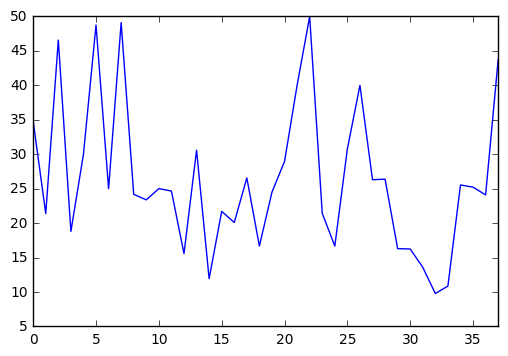

In [30]:
#looking for the Mnahattan anomally 

print mndf[mndf['avrall']<20]

mndf.avrgreen.plot()

In [32]:
#calculate average for each borough - data frame for both green and all, one value

# Bronx 

print '- Bronx average all is',  bxdf.avrall.mean()
print '- Bronx average green is',  bxdf.avrgreen.mean()

# Brooklyn 

print '- Brooklyn average all is',  bkdf.avrall.mean()
print '- Brooklyn average green is',  bkdf.avrgreen.mean()

# Queens 

print '- Queens average all is',  qndf.avrall.mean()
print '- Queens average green is',  qndf.avrgreen.mean()

# Manahattan 

print '- Manahattan average all is',  mndf.avrall.mean()
print '- Manahattan average green is',  mndf.avrgreen.mean()




- Bronx average all is 39.0512636931
- Bronx average green is 34.9688939246
- Brooklyn average all is 33.6718250267
- Brooklyn average green is 29.4244644577
- Queens average all is 37.9173209297
- Queens average green is 29.6516337811
- Manahattan average all is 33.3306638771
- Manahattan average green is 26.4493733592


In [31]:
#average of green products per 

In [32]:
print mc['precgreen2'].head()
print mc['precall2'].head()

0     5.882353
1    16.666667
2    14.285714
3    26.470588
4    30.000000
Name: precgreen2, dtype: float64
0    11.764706
1    16.666667
2    23.809524
3    32.352941
4    40.000000
Name: precall2, dtype: float64


In [31]:
#green1 =mc['numeratorgreen1'].tolist()
#green2 =mc['numeratorgreen2'].tolist()


## cohen's kappa test:

In [32]:
#testing cohen's kappa with fabricated lists as inputs
green1 = [2,3,4,5,5,5,5,5,4,3,3,2,2]
green2 = [2,3,4,5,5,5,5,5,4,4,3,2,2]
mc['numeratorgreen1'] = mc['numerator green_1']
mc['numeratorgreen2'] = mc['numerator green_2']

In [33]:
cohen_kappa_score(precgreen1, precgreen2)

NameError: name 'precgreen1' is not defined

In [ ]:
len(mc)

In [ ]:
print mc.columns

In [ ]:
print mc['Borough'].value_counts()

In [ ]:
print mc['Subway Station'].value_counts()

In [ ]:
#print mc['ZIP'].value_counts()

### Calculate precentage of green products per rater #1 

In [ ]:
#mc['rater_1_green_prec'] = mc['numerator green_1']/ mc['denominator green_1']

In [ ]:
#print mc['rater_1_green_prec'].head(10)

### Calculate precentage of all menthol products per rater #1

In [ ]:
 mc['rater_1_all_prec']= mc['numerator all_1']/ mc['denominator all_1']

In [ ]:
print mc['rater_1_all_prec'].head(10)

### Calculate precentage of green products per rater #2 

In [ ]:
mc['rater_2_green_prec'] = mc['numerator green_2']/ mc['denominator green_2']

In [ ]:
print mc['rater_2_green_prec'].head(10)

## DataFrame to CSV 

In [ ]:
mc.to_csv('mapcorps analysis')

In [ ]:
 mc[mc['Borough']=='BK' & mc['Images (Y/N)']=='Y', 'yes', 'no')]

## by borough have images at all


In [ ]:
print "Brooklyn Images", len(mc[(mc['Borough'] == "BK") & (mc['Images (Y/N)'] == "Y")]) 
print "Queens Imgeas", len(mc[(mc['Borough'] == "QN") & (mc['Images (Y/N)'] == "Y")]) 
print "Bronx Images", len(mc[(mc['Borough'] == "BX") & (mc['Images (Y/N)'] == "Y")]) 
print "Manhattan Images", len(mc[(mc['Borough'] == "MN") & (mc['Images (Y/N)'] == "Y")]) 

## by borough have images with good quality 

In [ ]:
#print "Brooklyn", len(mc[(mc['Borough'] == "BK") & (mc['Images (Y/N)'] == "Y") & (mc['Quality (Y/N)'] == "Y")]) 
print "Brooklyn quality", len(mc[(mc['Borough'] == "BK")  & (mc['Images (Y/N)'] == "Y")& (mc['Quality (Y/N)'] == "Y")]) 
print "Queens quality", len(mc[(mc['Borough'] == "QN")  & (mc['Images (Y/N)'] == "Y")& (mc['Quality (Y/N)'] == "Y")]) 
print "Bronx quality", len(mc[(mc['Borough'] == "BX") & (mc['Images (Y/N)'] == "Y") & (mc['Quality (Y/N)'] == "Y")]) 
print "Manhattan quality", len(mc[(mc['Borough'] == "MN") & (mc['Images (Y/N)'] == "Y") & (mc['Quality (Y/N)'] == "Y")]) 



#print "Queens", len(mc[(mc['Borough'] == "QN") & (mc['Images (Y/N)'] == "Y")]) 
#print "Bronx", len(mc[(mc['Borough'] == "BX") & (mc['Images (Y/N)'] == "Y")]) 
#print "Manhattan", len(mc[(mc['Borough'] == "MN") & (mc['Images (Y/N)'] == "Y")]) 

In [ ]:
print mc.columns

In [ ]:
mc.Borough.unique()

In [ ]:
mc['SubwaySatation'] = mc['Subway Station']

In [ ]:
mc.SubwaySatation.unique()

In [ ]:
mc.ZIP.unique()

In [ ]:
mc.Name.unique()